<h1>Collision Plot

<h3>Import

In [7]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m

import matplotlib.pyplot as plt

import seaborn as sns

<h3>Collisions

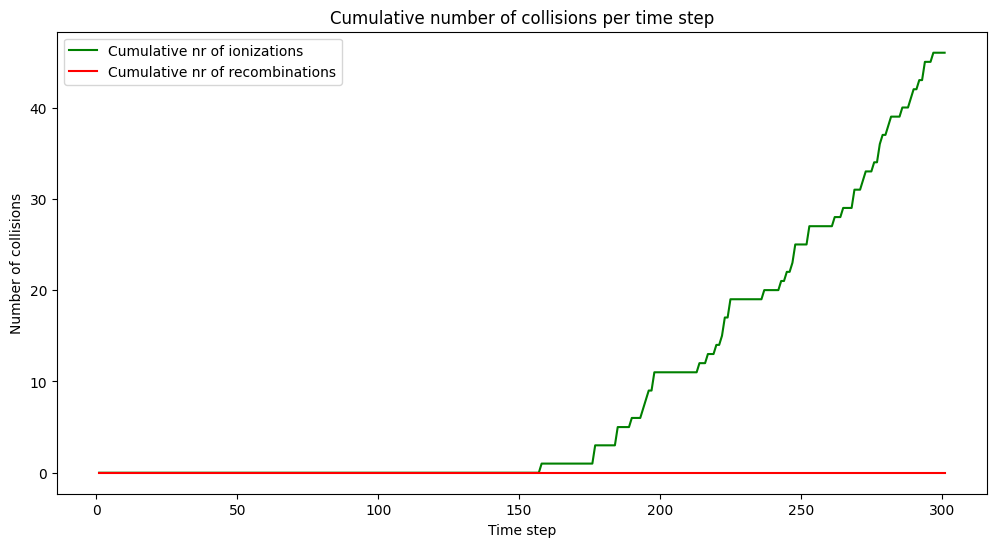

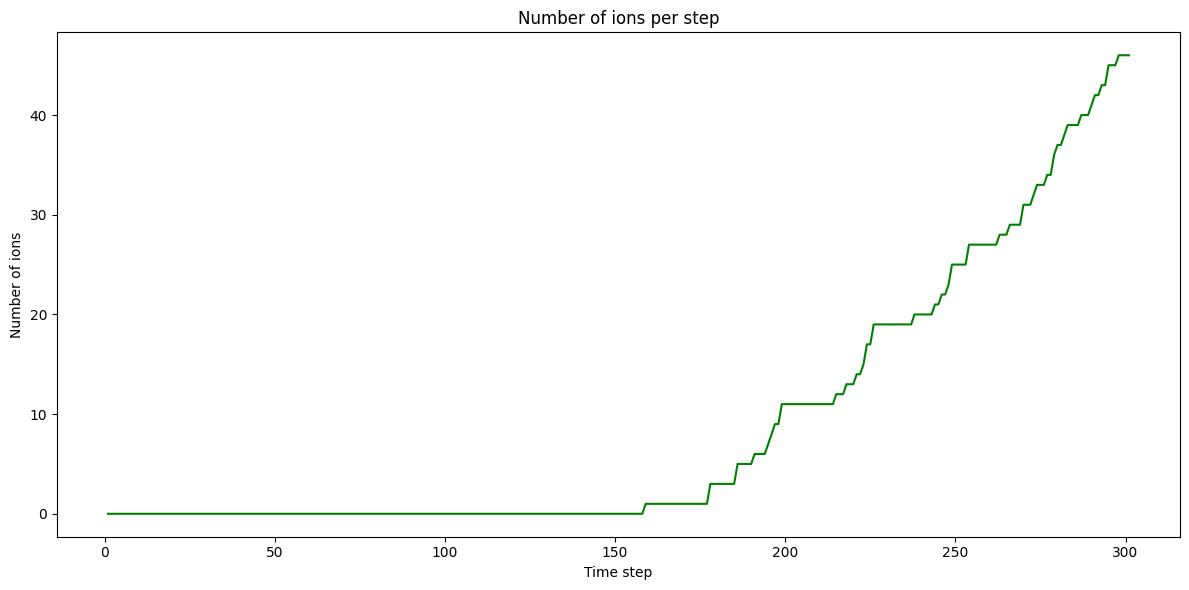

In [8]:
# Collisions
# Read the data into a pandas dataframe
filename = '../out/collisions.dt'
df_coll = pd.read_csv(filepath_or_buffer=filename, index_col=None, delim_whitespace=True, \
                    header=None, names=['step', 'nrColl', 'nrIon', 'nrRecom'])

# Plot a cumulative plot of nrIon and nrRecom
plt.figure(figsize=(12, 6))
plt.plot(df_coll['step'], df_coll['nrIon'].cumsum(), label='Cumulative nr of ionizations', color='g')
plt.plot(df_coll['step'], df_coll['nrRecom'].cumsum(), label='Cumulative nr of recombinations', color='r')
plt.xlabel('Time step')
plt.ylabel('Number of collisions')
plt.title('Cumulative number of collisions per time step')
plt.legend()
plt.show()

# Ramo current
# Read the data into a pandas dataframe
filename = '../out/ramo_current.dt'
df_cur = pd.read_csv(filepath_or_buffer=filename, index_col = None,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])

plt.figure(figsize=(12, 6)) 
plt.plot(df_cur['step'], df_cur['nrIon'], label='nrIon', color='g')
plt.xlabel('Time step')
plt.ylabel('Number of ions')
plt.title('Number of ions per step')
plt.tight_layout()  # Adjust cthe spacing between subplots
plt.show()


Number of ionizations: 47
From ionization: 0. From photo emission: 47

Number of recombinations: 0
From ion emission: 0. From photo emission: 0
Average lifetime of recombined ions: nan

Colliding electron recombines with newly created ion: 0
Released electron recombines with newly created ion: 0



/home/arnar/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/arnar/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_470353/1385390903.py:184: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


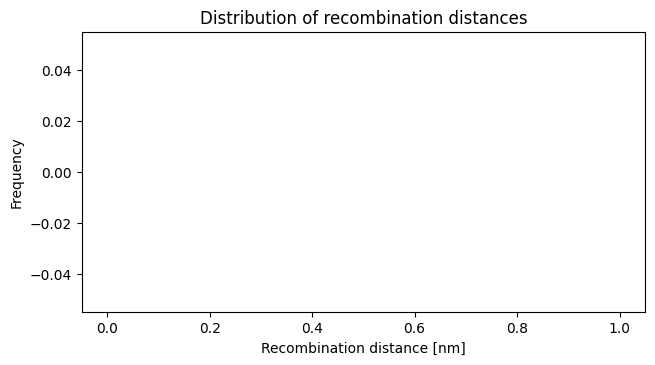

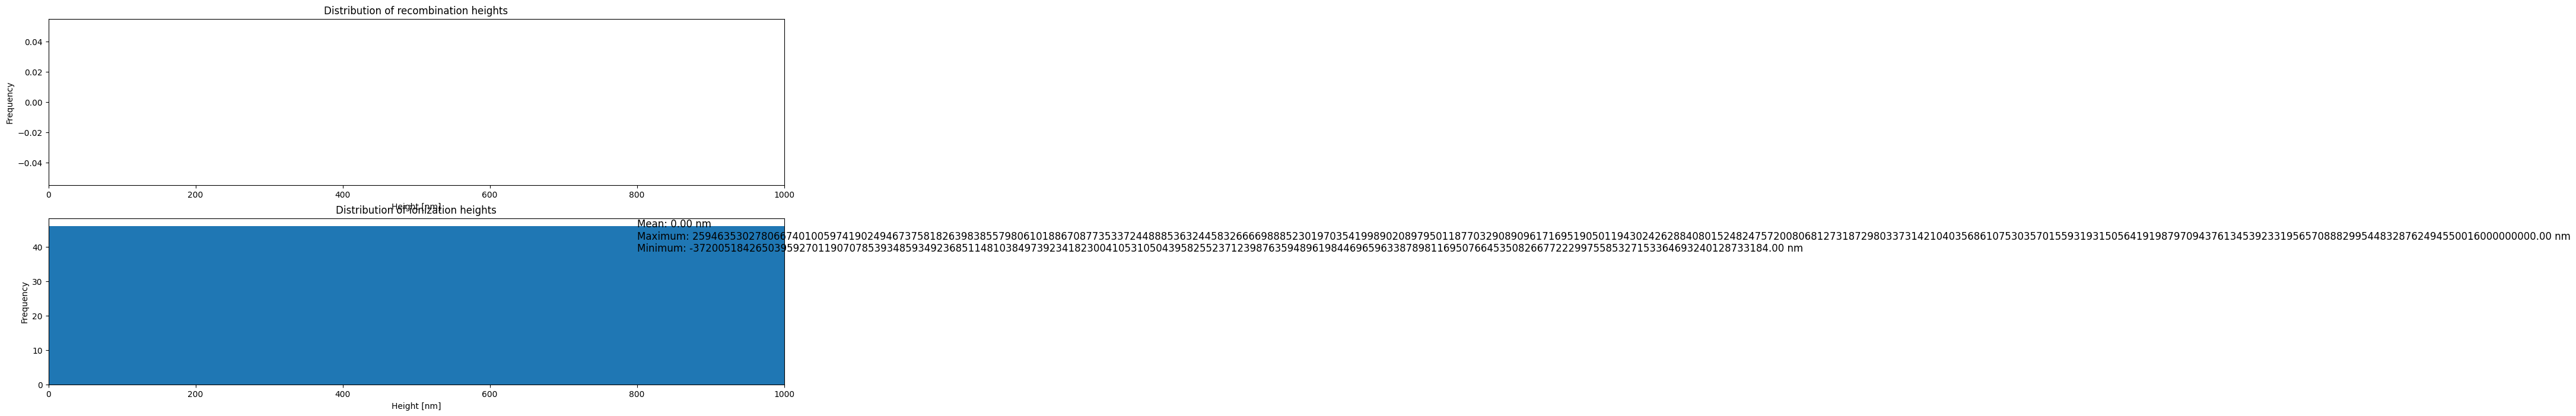

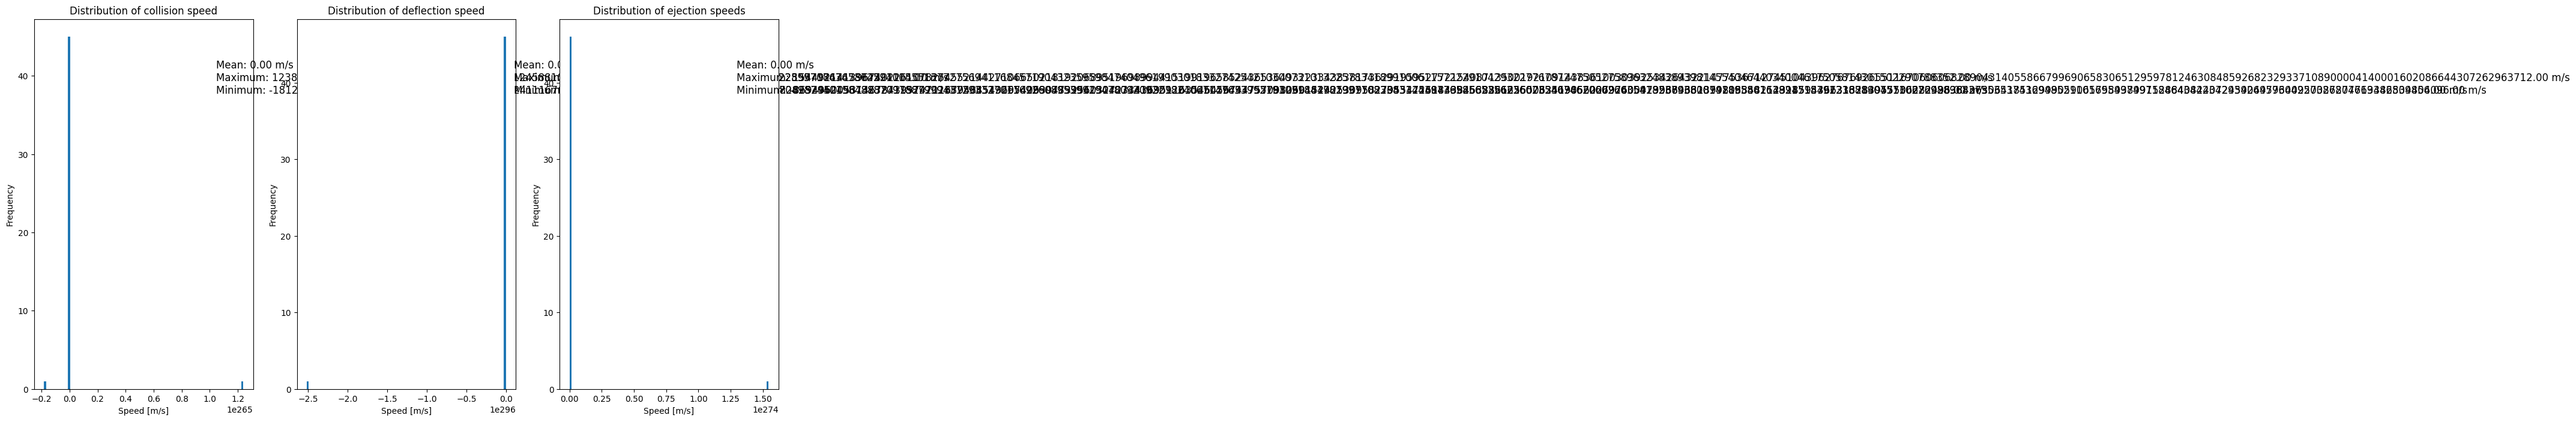

In [9]:

recombinations = 0
recom_heights = []
recom_speeds = []
recom_dists = []
recom_kramers = []
recom_from_ion = 0
recom_from_photo = 0
recom_id_pairs = []
recom_life = []
recom_from_ion_heights = []
recom_from_photo_heights = []

filename = '../out/recombination_data.bin'
with open(filename, 'rb') as f:
    while True:
        try:
            step = np.fromfile(file=f, count=1, dtype=np.int32)
            x, y, z, vel, dist, kramers = np.fromfile(file=f, count=6, dtype=np.float64)
            elecID, ionID, elecEmit, life = np.fromfile(file=f, count=4, dtype=np.int64)
        except:
            break
        recom_heights.append(z*1e9)
        recom_speeds.append(vel)
        recom_dists.append(dist*1e9)
        recom_kramers.append(kramers*1e9)
        recom_id_pairs.append((elecID, ionID))
        recom_life.append(int(life))
        recombinations += 1
        if elecEmit == 1:
            recom_from_photo += 1
            recom_from_photo_heights.append(z*1e9)
        elif elecEmit == 100:
            recom_from_ion += 1
            recom_from_ion_heights.append(z*1e9)

ionizations = 0
ion_from_ion = 0
ion_from_photo = 0
ion_id_trios = []
inVels = []
outVels = []
newVels = []
ion_heights = []

filename = '../out/ionization_data.bin'
with open(filename, 'rb') as f:
    while True:
        try:
            step = np.fromfile(file=f, count=1, dtype=np.int32)
            x,y,z,inVel,outVel,newVel,ion_dist,ion_rad = np.fromfile(file=f, count=8, dtype=np.float64)
            inID,newID,ionID,emitter = np.fromfile(file=f,count=4,dtype=np.int64)
        except:
            break
        ionizations += 1
        inVels.append(inVel)
        outVels.append(outVel)
        newVels.append(newVel)
        ion_heights.append(z*1e9)
        ion_id_trios.append((inID,newID,ionID))
        if emitter == 100:
            ion_from_ion += 1
        else:
            ion_from_photo += 1 

recom_from_collided_ion = 0
recom_from_released_ion = 0
for pair, trio in zip(recom_id_pairs, ion_id_trios):
    if pair[1] == trio[2]:
        if pair[0] == trio[0] :
            recom_from_collided_ion += 1
        elif pair[0] == trio[1]:
            recom_from_released_ion += 1 
            
print(f'Number of ionizations: {ionizations}')
print(f'From ionization: {ion_from_ion}. From photo emission: {ion_from_photo}')
print('')

print(f'Number of recombinations: {recombinations}')
print(f'From ion emission: {recom_from_ion}. From photo emission: {recom_from_photo}')
print(f'Average lifetime of recombined ions: {np.mean(recom_life)}')
print('')

print(f'Colliding electron recombines with newly created ion: {recom_from_collided_ion}')
print(f'Released electron recombines with newly created ion: {recom_from_released_ion}')    
print('')

try:
    plt.figure(figsize=(16, 8))  # Increase the figure size
    # Plot distribution of distances
    plt.subplot(2, 2, 1)
    data = recom_dists
    unit = 'nm'
    plt.hist(recom_dists, bins=100)
    plt.xlabel(f'Recombination distance [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination distances')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    plt.yscale('log')  # Set the y-axis scale to log

    # Plot distribution of kramers radii
    plt.subplot(2, 2, 2)
    data = recom_kramers
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlabel(f'Kramers Radius [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination kramers radii')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    plt.yscale('log')  # Set the y-axis scale to log

    # Plot distribution of speeds
    plt.subplot(2, 2, (3,4))
    data = recom_speeds
    unit = 'm/s'
    plt.hist(data, bins=100)
    plt.xlabel(f'Speed [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination speeds')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    # plt.yscale('log')  # Set the y-axis scale to log

    plt.tight_layout()
    plt.show()

    plt.figure(figsize = (16,8))
    plt.subplot(2, 1, 1)
    data = recom_from_ion_heights
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlim(0,1000)
    plt.xlabel(f'Height [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination heights from ionization')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    # plt.yscale('log')  # Set the y-axis scale to log

    plt.subplot(2, 1, 2)
    data = recom_from_photo_heights
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlim(0,1000)
    plt.xlabel(f'Height [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination heights from photo emission')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)

    plt.tight_layout()
    plt.show()
except:
    pass

plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
try:
    data = recom_heights
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlim(0,1000)
    plt.xlabel(f'Height [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination heights')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    # plt.yscale('log')  # Set the y-axis scale to log
except:
    pass

plt.subplot(2, 1, 2)
data = ion_heights
unit = 'nm'
plt.hist(data, bins=100)
plt.xlim(0,1000)
plt.xlabel(f'Height [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of ionization heights')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))  # Increase the figure size

plt.subplot(1, 3, 1)

data = inVels
unit = 'm/s'
plt.hist(inVels,bins=100)
plt.xlabel(f'Speed [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of collision speed')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
# plt.yscale('log')  # Set the y-axis scale to log

plt.subplot(1, 3, 2)
data = outVels
unit = 'm/s'
plt.hist(data,bins=100)
plt.xlabel(f'Speed [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of deflection speed')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
# plt.yscale('log')  # Set the y-axis scale to log

plt.subplot(1, 3, 3)
data = newVels
unit = 'm/s'
plt.hist(newVels,bins=100)
plt.xlabel(f'Speed [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of ejection speeds')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
# plt.yscale('log')  # Set the y-axis scale to log
plt.show()

# print(f'Average in speed: {np.mean(inVels)} m/s')
# print(f'Median in speed: {np.median(inVels)} m/s')
# print(f'Maximum in speed: {max(inVels)} m/s')
# print(f'Minimum in speeds: {min(inVels)} m/s')
# print('')

# print(f'Average out speed: {np.mean(outVels)} m/s')
# print(f'Median out speed: {np.median(outVels)} m/s')
# print(f'Maximum out speed: {max(outVels)} m/s')
# print(f'Minimum out speeds: {min(outVels)} m/s')
# print('')

# print(f'Average new speed: {np.mean(newVels)} m/s')
# print(f'Median in speed: {np.median(newVels)} m/s')
# print(f'Maximum new speed: {max(newVels)} m/s')
# print(f'Minimum new speeds: {min(newVels)} m/s')

# print(f'Median distance: {np.median(recom_dists)} nm')
# print(f'Mean distance: {np.mean(recom_dists)} nm')
# print(f'Maximum distance: {max(recom_dists)} nm')
# print(f'Minimum distance: {min(recom_dists)} nm')
# print('')

# print(f'Median speed: {np.median(recom_speeds)} m/s')
# print(f'Mean speed: {np.mean(recom_speeds)} nm')
# print(f'Maximum speed: {max(recom_speeds)} nm/s')
# print(f'Minimum speed: {min(recom_speeds)} nm/s')
# print('')

# print(f'Median kramers: {np.median(recom_kramers)} nm')
# print(f'Mean kramers: {np.mean(recom_kramers)} m')
# print(f'Maximum kramers: {max(recom_kramers)} nm')
# print(f'Minimum kramers: {min(recom_kramers)} nm')
# ax1.set_xlabel('x [nm]')
# ax1.set_ylabel('y [nm]')
# ax1.set_zlabel('z [nm]')


<!-- Collision data -->

In [10]:
# recom_filename = '../out/recombination_data.bin'
# recom_dt_abs_type = np.dtype([('step', np.int64), ('x', np.float64), ('y', np.float64), ('z', np.float64), ('vel', np.float64), ('dist', np.float64), ('kramers', np.float64), ('elec_id', np.int64), ('ion_id', np.int64), ('elec_emit', np.int64), ('life', np.int64)])
# recom_data_mem_abs = np.memmap(recom_filename, dtype=recom_dt_abs_type, mode='r', order='F')
# recom_data = pd.DataFrame(recom_data_mem_abs)

ion_filename = '../out/ionization_data.bin'
ion_dt_abs_type = np.dtype([('step', np.int64), ('x', np.float64), ('y', np.float64), ('z', np.float64), ('in_vel', np.float64), ('out_vel', np.float64), ('new_vel', np.float64), ('ion_dist', np.float64), ('ion_rad', np.float64), ('in_id', np.int64), ('new_id', np.int64), ('ion_id', np.int64), ('elec_emit', np.int64)])
ion_data_mem_abs = np.memmap(ion_filename, dtype=ion_dt_abs_type, mode='r', order='F')
ion_data = pd.DataFrame(ion_data_mem_abs)

# # nr recom where ion_id == 2
# nr_recom = len(recom_data)
# nr_recom_emit = len(recom_data[recom_data['elec_emit'] == 1])
# nr_recom_ion = len(recom_data[recom_data['elec_emit'] == 2])
# nr_recom_recom = len(recom_data[recom_data['elec_emit'] == 3])
# print(f'Number of recombinations: {nr_recom}')
# print(f'    From emission: {nr_recom_emit}')
# print(f'    From ionization: {nr_recom_ion}')
# print(f'    From recombination: {nr_recom_recom}')

nr_ion = len(ion_data)
nr_ion_emit = len(ion_data[ion_data['elec_emit'] == 1])
nr_ion_ion = len(ion_data[ion_data['elec_emit'] == 2])
nr_ion_recom = len(ion_data[ion_data['elec_emit'] == 3])
print(f'Number of ionizations: {nr_ion}')
print(f'    From emission: {nr_ion_emit}')
print(f'    From ionization: {nr_ion_ion}')
print(f'    From recombination: {nr_ion_recom}')

Number of ionizations: 46
    From emission: 0
    From ionization: 46
    From recombination: 0
